# Задача 1
Необходимо реализовать генератор field. Генератор field последовательно выдает значения ключей словаря. Пример:
goods = [
    {'title': 'Ковер', 'price': 2000, 'color': 'green'},
    {'title': 'Диван для отдыха', 'color': 'black'}
]
field(goods, 'title') должен выдавать 'Ковер', 'Диван для отдыха'
field(goods, 'title', 'price') должен выдавать {'title': 'Ковер', 'price': 2000}, {'title': 'Диван для отдыха'}
- В качестве первого аргумента генератор принимает список словарей, дальше через *args генератор принимает неограниченное количествово аргументов.
- Если передан один аргумент, генератор последовательно выдает только значения полей, если значение поля равно None, то элемент пропускается.
- Если передано несколько аргументов, то последовательно выдаются словари, содержащие данные элементы. Если поле равно None, то оно пропускается. Если все поля содержат значения None, то пропускается элемент целиком.

## Field.py

In [1]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #1. """


def field(items, *args):
    assert len(args) > 0, 'The parameter "args" is empty!'
    if len(args) == 1:
        return (item[el] for item in items for el in item if el == args[0] and item[el] is not None)
    else:
        return {el: item[el] for item in items for el in item for argument in args if
                el == argument and item[argument] is not None}


def main1():
    print('\n---#1---')

    goods = [
        {'title': 'Ковер', 'price': 2000, 'color': 'green'},
        {'title': 'Диван для отдыха', 'price': 5300, 'color': 'black'}
    ]
    # должен выдавать 'Ковер', 'Диван для отдыха'.
    res = (field(goods, 'title'))
    for el in res:
        print(el)
    # должен выдавать {'title': 'Ковер', 'price': 2000}, {'title': 'Диван для отдыха', 'price': 5300}.
    print(field(goods, 'title', 'price'))


if __name__ == '__main__':
    main1()



---#1---
Ковер
Диван для отдыха
{'title': 'Диван для отдыха', 'price': 5300}


# Задача 2.

Необходимо реализовать генератор gen_random(количество, минимум, максимум), который последовательно выдает заданное количество случайных чисел в заданном диапазоне от минимума до максимума, включая границы диапазона. Пример:
gen_random(5, 1, 3) должен выдать 5 случайных чисел в диапазоне от 1 до 3, например 2, 2, 3, 2, 1

## Get_random.py

In [2]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #2. """
from random import randint


def get_random(num_count, begin, end):
    """
    Рандомные числа
    :param num_count: число случайных чисел
    :param begin: с какого числа
    :param end: по какое
    :return: картеж чисел
    """
    return (randint(begin, end) for _ in range(num_count))


def main2():
    print('\n---#2---')
    numbers = get_random(4, 0, 5)
    for el in numbers:
        print(el, end=' ')
    print()


if __name__ == '__main__':
    main2()



---#2---
3 5 0 2 


# Задача 3.
Необходимо реализовать итератор Unique(данные), который принимает на вход массив или генератор и итерируется по элементам, пропуская дубликаты.
Конструктор итератора также принимает на вход именованный bool-параметр ignore_case, в зависимости от значения которого будут считаться одинаковыми строки в разном регистре. По умолчанию этот параметр равен False.
При реализации необходимо использовать конструкцию **kwargs.
Итератор должен поддерживать работу как со списками, так и с генераторами.
Итератор не должен модифицировать возвращаемые значения.

## Unique.py

In [3]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #3. """


# Итератор для удаления дубликатов
class Unique(object):
    def __init__(self, items, ignore_case=False, **kwargs):
        self._data = items
        self._ignore_case = ignore_case
        self.__used_data = set()
        self.__index = 0

    def __next__(self):
        # Если игнорируем капс, то пробегаемся по списку и приводим всё к общему капсу.
        if self._ignore_case:
            for counter, el in enumerate(self._data):
                if type(el) is str:
                    self._data[counter] = el.lower()

        while True:
            if self.__index >= len(self._data):
                raise StopIteration
            else:
                current = self._data[self.__index]
                self.__index += 1
                # если текущего числа ещё не было, добавляем и возвращаем.
                if current not in self.__used_data:
                    self.__used_data.add(current)
                    return current

    def __iter__(self):
        return self


def main3():
    print('\n---#3---')
    data = ['a', 'A', 'b', 'B', 'a', 'A', 'b', 'B']
    it = Unique(data, ignore_case=True)
    try:
        while True:
            print(it.__next__())
    except StopIteration:
        print('The error "StopInteration" was caught')


if __name__ == '__main__':
    main3()



---#3---
a
b
The error "StopInteration" was caught


# Задача 4.
Дан массив 1, содержащий положительные и отрицательные числа. Необходимо одной строкой кода вывести на экран массив 2, которые содержит значения массива 1, отсортированные по модулю в порядке убывания. Сортировку необходимо осуществлять с помощью функции sorted. 
Необходимо решить задачу двумя способами:
С использованием lambda-функции.
Без использования lambda-функции.

## Sort.py

In [4]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #4 """


def main4():
    data = [4, -30, 100, -100, 123, 1, 0, -1, -4]
    result = sorted(data, key=abs, reverse=True)
    print(result)

    result_with_lambda = sorted(data, key=lambda a: abs(a), reverse=True)
    print(result_with_lambda)


if __name__ == '__main__':
    main4()


[123, 100, -100, -30, 4, -4, 1, -1, 0]
[123, 100, -100, -30, 4, -4, 1, -1, 0]


# Задача 5.
Необходимо реализовать декоратор print_result, который выводит на экран результат выполнения функции.
Декоратор должен принимать на вход функцию, вызывать её, печатать в консоль имя функции и результат выполнения, после чего возвращать результат выполнения.
Если функция вернула список (list), то значения элементов списка должны выводиться в столбик.
Если функция вернула словарь (dict), то ключи и значения должны выводить в столбик через знак равенства.

## Cm_timer.py

In [9]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #6 """
from time import sleep, time
from contextlib import contextmanager


class cm_timer_1:
    def __int__(self):
        self.__start = 0
        self.__finish = 0

    def __enter__(self):
        self.__start = time()
        # return self.__start

    def __exit__(self, exp_type, exp_value, traceback):
        self.__finish = time()
        print(f'Time of work: {self.__finish - self.__start}')


@contextmanager
def cm_timer_2():
    st = time()
    yield None
    en = time()
    print(f'Time of work: {en - st}')


def main6():
    with cm_timer_1():
        sleep(2.5)

    with cm_timer_2():
        sleep(2.5)


if __name__ == '__main__':
    main6()


Time of work: 2.5051052570343018
Time of work: 2.5027549266815186


# Задача 6. 
Необходимо написать контекстные менеджеры cm_timer_1 и cm_timer_2, которые считают время работы блока кода и выводят его на экран. Пример:
with cm_timer_1():
    sleep(5.5)
После завершения блока кода в консоль должно вывестись time: 5.5 (реальное время может несколько отличаться).
cm_timer_1 и cm_timer_2 реализуют одинаковую функциональность, но должны быть реализованы двумя различными способами (на основе класса и с использованием библиотеки contextlib).

## Print_result.py

In [10]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
""" Task #5 """


def print_result(func):
    def wrapper(lst=[], *args, **kwargs):
        print(func.__name__)

        if len(lst) == 0:
            result = func(*args, **kwargs)
        else:
            result = func(lst, *args, **kwargs)

        if type(result) is dict:
            for key, el in result.items():
                print(f'{key} = {el}')

        elif type(result) is list:
            print('\n'.join(map(str, result)))

        else:
            print(result)

        return result

    return wrapper


@print_result
def test_1():
    return 1


@print_result
def test_2():
    return 'iu5'


@print_result
def test_3():
    return {'a': 1, 'b': 2}


@print_result
def test_4():
    return [1, 2]


def main5():
    print('!!!!!!!!')
    test_1()
    test_2()
    test_3()
    test_4()


if __name__ == '__main__':
    main5()


!!!!!!!!
test_1
1
test_2
iu5
test_3
a = 1
b = 2
test_4
1
2


# Задача 7.
В предыдущих задачах были написаны все требуемые инструменты для работы с данными. Применим их на реальном примере.
В файле data_light.json содержится фрагмент списка вакансий.
Структура данных представляет собой список словарей с множеством полей: название работы, место, уровень зарплаты и т.д.
Необходимо реализовать 4 функции - f1, f2, f3, f4. Каждая функция вызывается, принимая на вход результат работы предыдущей. За счет декоратора @print_result печатается результат, а контекстный менеджер cm_timer_1 выводит время работы цепочки функций.
Предполагается, что функции f1, f2, f3 будут реализованы в одну строку. В реализации функции f4 может быть до 3 строк.
Функция f1 должна вывести отсортированный список профессий без повторений (строки в разном регистре считать равными). Сортировка должна игнорировать регистр. Используйте наработки из предыдущих задач.
Функция f2 должна фильтровать входной массив и возвращать только те элементы, которые начинаются со слова “программист”. Для фильтрации используйте функцию filter.
Функция f3 должна модифицировать каждый элемент массива, добавив строку “с опытом Python” (все программисты должны быть знакомы с Python). Пример: Программист C# с опытом Python. Для модификации используйте функцию map.
Функция f4 должна сгенерировать для каждой специальности зарплату от 100 000 до 200 000 рублей и присоединить её к названию специальности. Пример: Программист C# с опытом Python, зарплата 137287 руб. Используйте zip для обработки пары специальность — зарплата.

## process_data.py

In [ ]:
# Copyright 2022 Dmitriy <dimapermyakov55@gmail.com>
from Code.lab_python_fp.print_result import print_result
from Code.lab_python_fp.cm_timer import cm_timer_1
from Code.lab_python_fp.get_random import get_random
import json
import sys

try:
    path = sys.argv[1]
    print(path)
except:
    path = '../file.json'

with open(path) as f:
    data = json.load(f)


@print_result
def f1(arg) -> list:
    """
    Выводит отсортированный список профессий без повторений.
    Сортировка должна игнорировать регистр.
    :param arg: список
    :return: отсортированный список
    """
    return sorted(list(set([el['job-name'] for el in arg])), key=lambda x: x.lower())


@print_result
def f2(arg) -> list:
    """
    Фильтрует входной массив и возвращает только те элементы, которые начинаются со слова “программист”
    :param arg:
    :return:
    """
    return list(filter(lambda text: (text.split())[0].lower() == 'программист', arg))


@print_result
def f3(arg) -> list:
    """
    Функция f3 должна модифицировать каждый элемент массива, добавив строку “с опытом Python”
    :param arg:
    :return:
    """
    return list(map(lambda lst: lst + ' с опытом Python', arg))


@print_result
def f4(arg) -> list:
    """
    Функция f4 должна сгенерировать для каждой специальности зарплату
    от 100 000 до 200 000 рублей и присоединить её к названию специальности.
    Пример: Программист C# с опытом Python, зарплата 137287 руб.
    Используйте zip для обработки пары специальность — зарплата.
    :param arg:
    :return:
    """
    return list(zip(arg, ['зарплата ' + str(el) + ' руб.' for el in get_random(len(arg), 100000, 200000)]))


if __name__ == '__main__':
    with cm_timer_1():
        f4(f3(f2(f1(data))))


# Результат.
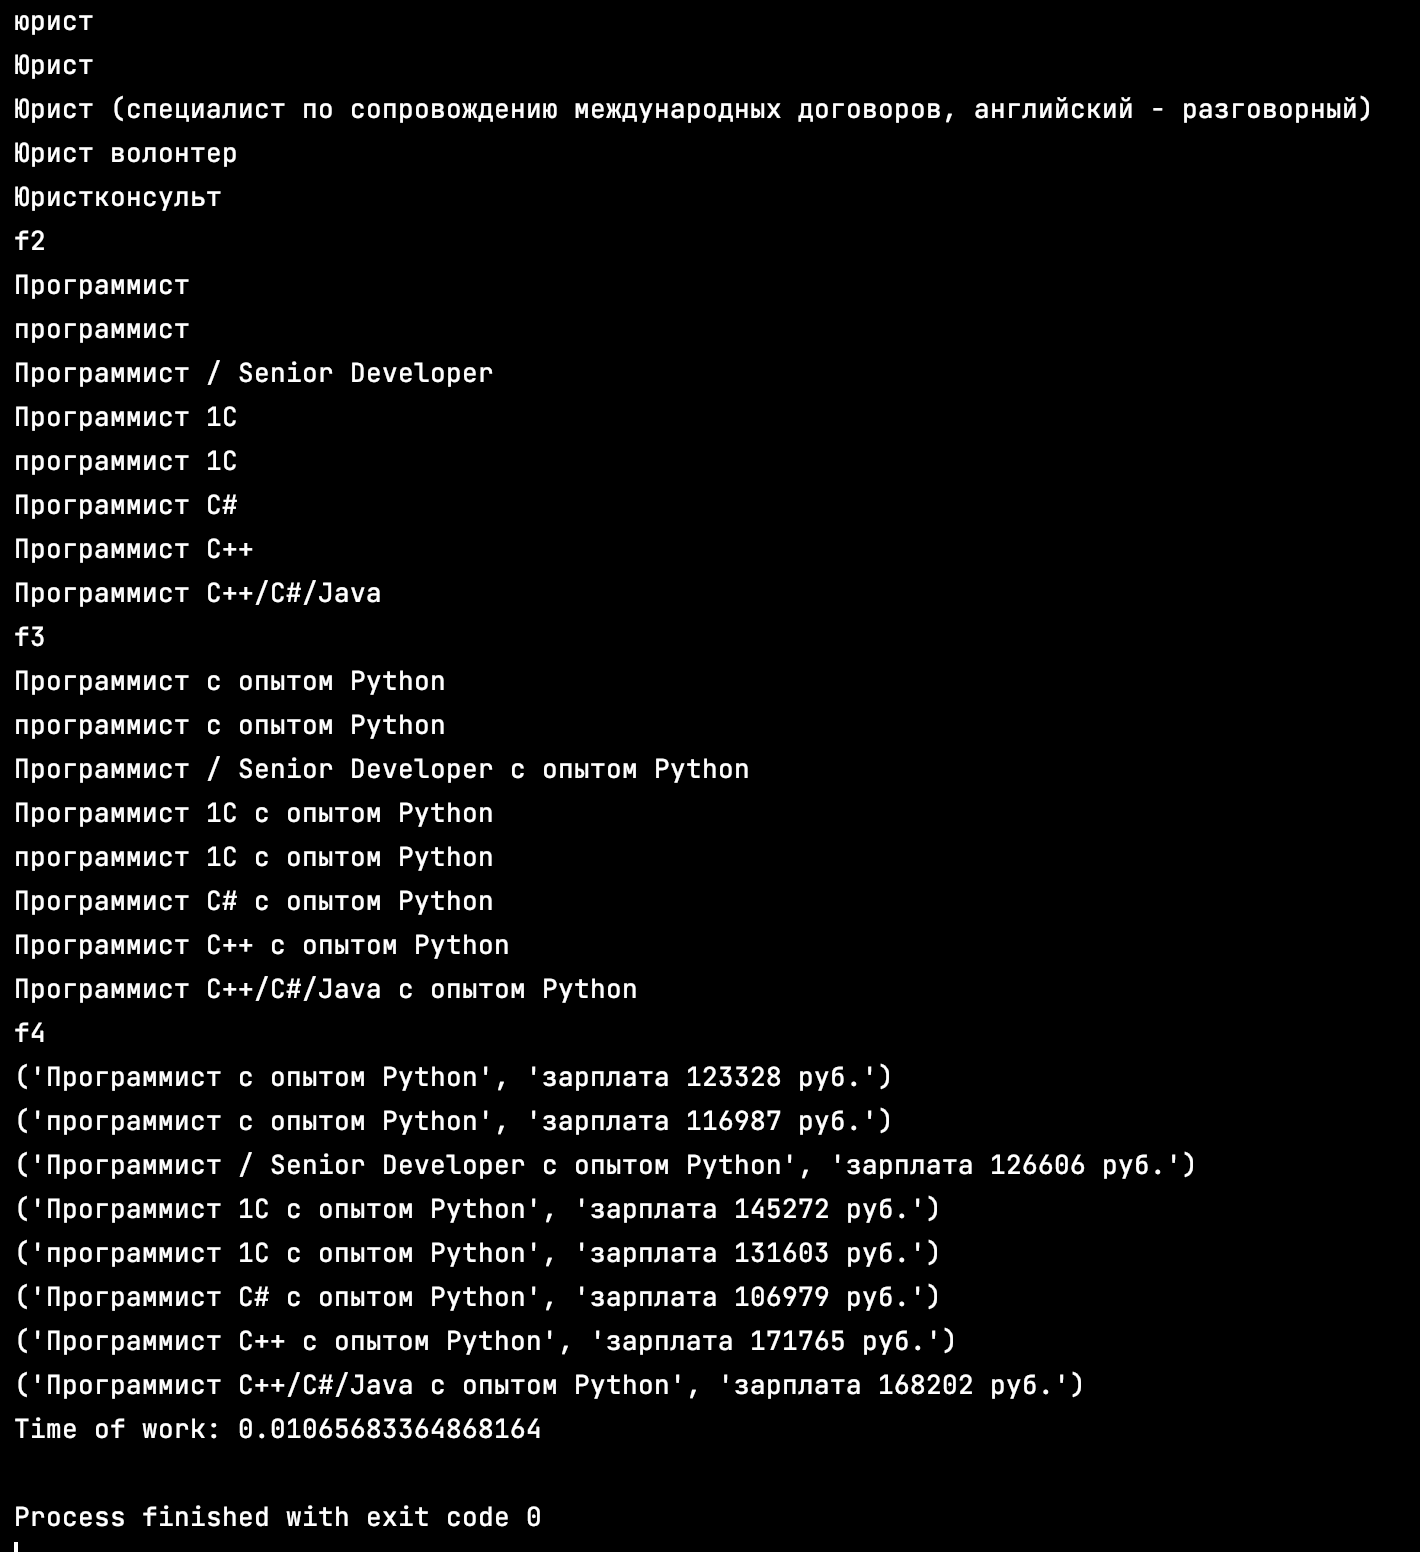

# Дополнительное задание.
Дан список. Вывести картеж чис